In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("train.csv")


In [2]:
y = data['SalePrice']

MSSubClassDummies = pd.get_dummies(data['MSSubClass'], prefix='MSSubClass')
MSZoningDummies = pd.get_dummies(data['MSZoning'], prefix='MSZoning')
StreetDummies = pd.get_dummies(data['Street'], prefix='Street')
AlleyDummies = pd.get_dummies(data['Alley'], prefix='Alley')
LotShapeDummies = pd.get_dummies(data['LotShape'], prefix='LotShape')
LandContourDummies = pd.get_dummies(data['LandContour'], prefix='LandContour')
UtilitiesDummies =  pd.get_dummies(data['Utilities'], prefix='Utilities')
LotConfigDummies  = pd.get_dummies(data['LotConfig'], prefix='LotConfig')
LandSlopeDummies = pd.get_dummies(data['LandSlope'], prefix='LandSlope')
Condition1Dummies = pd.get_dummies(data['Condition1'], prefix='Condition1')
Condition2Dummies = pd.get_dummies(data['Condition2'], prefix='Condition2')
BldgTypeDummies = pd.get_dummies(data['BldgType'], prefix='BldgType')
HouseStyleDummies = pd.get_dummies(data['HouseStyle'], prefix='HouseStyle')
RoofStyleDummies = pd.get_dummies(data['RoofStyle'], prefix='RoofStyle')
RoofMatlDummies = pd.get_dummies(data['RoofMatl'], prefix='RoofMatl')
Exterior1stDummies = pd.get_dummies(data['Exterior1st'], prefix='Exterior1st')
Exterior2ndDummies = pd.get_dummies(data['Exterior2nd'], prefix='Exterior2nd')
MasVnrTypeDummies = pd.get_dummies(data['MasVnrType'], prefix='MasVnrType')
FoundationDummies = pd.get_dummies(data['Foundation'], prefix='Foundation')
BsmtExposureDummies = pd.get_dummies(data['BsmtExposure'], prefix='BsmtExposure')
RoofMatlDummies = pd.get_dummies(data['RoofMatl'], prefix='RoofMatl')
HeatingDummies = pd.get_dummies(data['Heating'], prefix='Heating')
CentralAirDummies = pd.get_dummies(data['CentralAir'], prefix='CentralAir')
ElectricalDummies = pd.get_dummies(data['Electrical'], prefix='Electrical')
FunctionalDummies = pd.get_dummies(data['Functional'], prefix='Functional')
GarageTypeDummies = pd.get_dummies(data['GarageType'], prefix='GarageType')
GarageFinishDummies = pd.get_dummies(data['GarageFinish'], prefix='GarageFinish')
PavedDriveDummies = pd.get_dummies(data['PavedDrive'], prefix='PavedDrive')
FenceDummies = pd.get_dummies(data['Fence'], prefix='Fence')
MiscFeatureDummies = pd.get_dummies(data['MiscFeature'], prefix='MiscFeature')
SaleTypeDummies = pd.get_dummies(data['SaleType'], prefix='SaleType')
SaleConditionDummies = pd.get_dummies(data['SaleCondition'], prefix='SaleCondition')

mapping1 = {k: v for v, k in enumerate(['Po', 'Fa', 'TA', 'Gd', 'Ex'])}
data['ExterQual'] = data['ExterQual'].map(mapping1)
data['ExterCond'] = data['ExterCond'].map(mapping1)
data['KitchenQual'] = data['KitchenQual'].map(mapping1)
data['HeatingQC'] = data['HeatingQC'].map(mapping1)

mapping2 = {k: v for v, k in enumerate(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])}
data['BsmtQual'] = data['BsmtQual'].map(mapping2)
data['BsmtCond'] = data['BsmtCond'].map(mapping2)
data['FireplaceQu'] = data['FireplaceQu'].map(mapping2)
data['GarageQual'] = data['GarageQual'].map(mapping2)
data['GarageCond'] = data['GarageCond'].map(mapping2)

mapping3 = {k: v for v, k in enumerate(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])}
data['BsmtFinType1'] = data['BsmtFinType1'].map(mapping3)
data['BsmtFinType2'] = data['BsmtFinType2'].map(mapping3)


In [3]:
numericalPredictors = data[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'ExterQual', 'ExterCond', 'KitchenQual', 'HeatingQC', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'SalePrice']]
X = pd.concat([numericalPredictors, MSSubClassDummies, MSZoningDummies, StreetDummies, AlleyDummies, LotShapeDummies, LandContourDummies, UtilitiesDummies, LotConfigDummies, LandSlopeDummies, BldgTypeDummies,Condition1Dummies, Condition2Dummies, FunctionalDummies, GarageTypeDummies, HouseStyleDummies, RoofStyleDummies, RoofMatlDummies, Exterior1stDummies, Exterior2ndDummies,MasVnrTypeDummies, BsmtExposureDummies, FoundationDummies, RoofMatlDummies,  HeatingDummies, CentralAirDummies, ElectricalDummies, GarageFinishDummies, PavedDriveDummies, FenceDummies, MiscFeatureDummies, SaleTypeDummies, SaleConditionDummies], axis=1).dropna()

X.reset_index(drop=True, inplace=True)

y = (X['SalePrice'] > data.median(axis=0)['SalePrice']).astype(int)
X = X.drop(['SalePrice'], axis=1)



In [4]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k)

def my_custom_error_rate_func(y_true, y_pred):
     numberOfIncorrect = np.count_nonzero(np.logical_xor(y_pred, y_true))
     n = len(y_true)
     return numberOfIncorrect/n

score = make_scorer(my_custom_error_rate_func, greater_is_better=False)

logit = LogisticRegression()



In [5]:
import math
from sklearn.metrics import log_loss

# compare best subsets of each size using BIC
def calculate_best_score(estimator, X, y, best_size_subset):
  best_score = np.inf
  
  best_subset = None
  list_scores = []

  i = 1
    
  for subset in best_size_subset:
    # we need error rate
    predictions = estimator.fit(X[list(subset['feature_names'])], y).predict_proba(X[list(subset['feature_names'])])
    #use BIC
    #log_loss is the negative log likelyhood
    n = len(X)
    score = 2 * log_loss(y, predictions) + math.log(n)*i/n
   
    if score < best_score:
      best_score, best_subset = score, subset
    
    list_scores.append(score)
    i = i + 1
  
  return best_subset, best_score, list_scores


In [6]:
sfs1 = SFS(logit, 
           k_features=40, 
           forward=True, 
           floating=False, 
           cv=0,
           scoring=score)

sfs1 = sfs1.fit(X, y)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[{'feature_idx': (14, 24, 35, 39, 60, 62, 71, 179), 'cv_scores': array([-0.08376068]), 'avg_score': -0.08376068376068375, 'feature_names': ('GrLivArea', 'GarageCars', 'ExterQual', 'BsmtQual', 'MSZoning_FV', 'MSZoning_RL', 'LotShape_Reg', 'BsmtExposure_Gd')}, 0.6065841857045476]


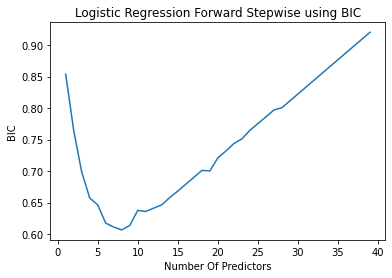

In [7]:
#due to some inner workings we need to convert to a list
best_size_subset = []
for i in range (1,40):
  best_size_subset.append(sfs1.subsets_[i])

#evaluate forward-selection using BIC
best_subset, best_score, list_scores = calculate_best_score(logit, X, y, best_size_subset)

plt.plot(np.arange(1,40), list_scores)
plt.ylabel("BIC")
plt.xlabel("Number Of Predictors")
plt.title("Logistic Regression Forward Stepwise using BIC")

print([best_subset, best_score])

In [8]:
CVsum = 0
bestX = X[list(best_subset['feature_names'])]

for train_indices, test_indices in kf.split(bestX, y):
  predictions = logit.fit(bestX.iloc[train_indices], y[train_indices]).predict(bestX.iloc[test_indices])
  #we need errorRate
  numberOfIncorrect = np.count_nonzero(np.logical_xor(predictions, y[test_indices]))
  error_rate = numberOfIncorrect/len(test_indices)
  CVsum = CVsum + error_rate

CV = CVsum / k



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print(CV)

0.09263588544710696


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='lsqr')

sfs2 = SFS(lda, 
           k_features=40, 
           forward=True, 
           floating=False, 
           cv=0,
           scoring=score)

sfs2 = sfs2.fit(X, y)


0.4212793265603313
0.34980326913965787
0.3099979523029916
0.29793341362961046
0.2860441175775503
0.2822563322990603
0.2771580516007232
0.26675634294759015
0.25950170617859397
0.25932465450316183
0.25829349290218356
0.25732564296768345
0.2561489282153481
0.25611947662265006
0.25553236009794383
0.2549459909122188
0.25353849075639995
0.251796003843078
0.2510703760138487
0.2510693790777273
0.2510467078957467
0.25061985213813265
0.25075715527583675
0.23249524161350113
0.2289126691052922
0.2272842918606103
0.22743087840351175
0.2274004205361338
0.22757496883268624
0.22680296339418077
0.22690673188582447
0.2269230859657384
0.22692308596572675
0.22446116717921905
0.2241214076521214
0.22412140765211608
0.22412136365334367
0.2241149005650837
0.22411490077214807
[{'feature_idx': (2, 3, 24, 30, 35, 63, 84, 160, 236), 'cv_scores': array([-0.08376068]), 'avg_score': -0.08376068376068375, 'feature_names': ('OverallQual', 'OverallCond', 'GarageCars', 'ScreenPorch', 'ExterQual', 'MSZoning_RM', 'LandSlo

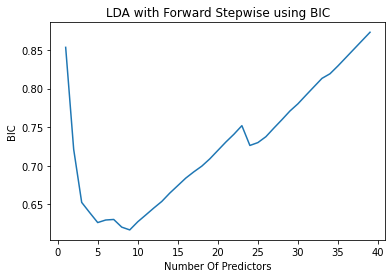

In [ ]:
#due to some inner workings we need to convert to a list
best_size_subset = []
for i in range (1,40):
  best_size_subset.append(sfs2.subsets_[i])

#evaluate forward-selection using BIC
best_subset, best_score, list_scores = calculate_best_score(lda, X, y, best_size_subset)

plt.plot(np.arange(1,40), list_scores)
plt.ylabel("BIC")
plt.xlabel("Number Of Predictors")
plt.title("LDA with Forward Stepwise using BIC")

print([best_subset, best_score])

In [ ]:
CVsum = 0
bestX = X[list(best_subset['feature_names'])]

for train_indices, test_indices in kf.split(bestX, y):
  predictions = lda.fit(bestX.iloc[train_indices], y[train_indices]).predict(bestX.iloc[test_indices])
  #we need errorRate
  numberOfIncorrect = np.count_nonzero(np.logical_xor(predictions, y[test_indices]))
  error_rate = numberOfIncorrect/len(test_indices)
  CVsum = CVsum + error_rate

CV = CVsum / k
print(CV)

0.10265926358854471


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


qda = QuadraticDiscriminantAnalysis()
sfs3 = SFS(qda, 
           k_features=40, 
           forward=True, 
           floating=False, 
           cv=0,
           scoring=score)

sfs3 = sfs3.fit(X, y)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:906: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:906: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: Use

0.4213717089513138
0.3514969921901238
0.3711926608609628
0.35079505325146004
0.35258495237446025
0.3310746649210231
0.32744557292427956
0.3155327559873277
0.30263977756802085
0.2951767196127406
0.28951883815922475
0.2931817089248844
0.2682821201176806
0.260262554364853
0.2621878608943374
0.26698703314551536
0.2648310076518945
0.2650381457321818
0.24995569477238547
0.24257837819633984
0.23310720495422477
0.22386659690245467
0.23101067489278385
0.22467776956773572
0.21807162545423422
0.2195132865793028
0.20632901869216935
0.20463541563427565
0.19049466238320806
0.18532058436531132
0.15841967108306423
0.13878509204972148
0.12706531156551543
0.12259851167613615


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.12202609972533514
0.10962019821564892
0.12587568958266163


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.1770492338218421
0.1229855006579887
[{'feature_idx': (0, 2, 3, 8, 9, 11, 15, 16, 17, 18, 19, 24, 26, 27, 30, 32, 33, 34, 39, 40, 50, 51, 57, 67, 74, 75, 83, 86, 95, 128, 146, 164, 176, 180, 210, 232), 'cv_scores': array([-0.02905983]), 'avg_score': -0.02905982905982906, 'feature_names': ('LotFrontage', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'BsmtQual', 'BsmtCond', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_180', 'Alley_Pave', 'LandContour_Low', 'LandContour_Lvl', 'LandSlope_Gtl', 'BldgType_1Fam', 'Condition1_PosN', 'HouseStyle_SLvl', 'Exterior1st_BrkFace', 'Exterior2nd_HdBoard', 'MasVnrType_None', 'BsmtExposure_Mn', 'GarageFinish_RFn', 'SaleCondition_Abnorml')}, 0.6113395870301813]


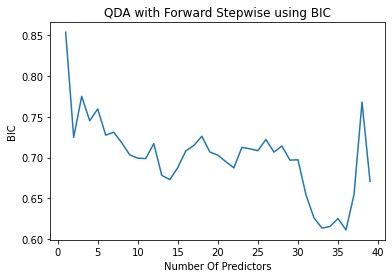

In [ ]:
#due to some inner workings we need to convert to a list
best_size_subset = []
for i in range (1,40):
  best_size_subset.append(sfs3.subsets_[i])

#evaluate forward-selection using BIC
best_subset, best_score, list_scores = calculate_best_score(qda, X, y, best_size_subset)

plt.plot(np.arange(1,40), list_scores)
plt.ylabel("BIC")
plt.xlabel("Number Of Predictors")
plt.title("QDA with Forward Stepwise using BIC")

print([best_subset, best_score])

In [ ]:
CVsum = 0
bestX = X[list(best_subset['feature_names'])]

for train_indices, test_indices in kf.split(bestX, y):
  predictions = lda.fit(bestX.iloc[train_indices], y[train_indices]).predict(bestX.iloc[test_indices])
  #we need errorRate
  numberOfIncorrect = np.count_nonzero(np.logical_xor(predictions, y[test_indices]))
  error_rate = numberOfIncorrect/len(test_indices)
  CVsum = CVsum + error_rate

CV = CVsum / k
print(CV)

0.1385447106954997


585